## Acessando as urls com os aquivos disponibilizados
Os arquivos estão disponíveis no Portal Dados Abertos, no conjunto de dados do Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome (MDS), acessado em https://dados.gov.br/dados/organizacoes/visualizar/ministerio-do-desenvolvimento-e-assistencia-social-familia-e-combate-a-fome

In [1]:
url_cad_2023 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2023*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2022 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2022*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2021 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2021*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2020 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2020*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2019 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2019*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2018 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2018*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2017 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2017*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2016 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2016*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2015 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2015*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2014 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2014*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2013 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2013*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2012 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2012*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2011 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2011*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2010 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2010*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2009 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2009*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2008 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2008*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2007 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2007*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2006 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2006*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'

## Dicionário do conjunto de dados

### Neste conjunto de dados temos as seguintes variáveis:

ibge: código ibge do município

anomes: Ano/mês de referência do dado

cadunico_tot_fam: total de famílias cadastradas

cadunico_tot_pes: total de pessoas cadastradas

cadunico_tot_fam_rpc_ate_meio_sm: total de famílias com renda per capita até meio salário mínimo

cadunico_tot_pes_rpc_ate_meio_sm:: total de pessoas com renda per capita até meio salário mínimo

cadunico_tot_fam_pob: total de famílias em situação de pobreza

cadunico_tot_pes_pob: total de pessoas em situação de pobreza

cadunico_tot_fam_ext_pob: total de famílias em situação de extrema pobreza

cadunico_tot_pes_ext_pob: total de pessoas em situação de extrema pobreza

cadunico_tot_fam_pob_e_ext_pob: total de famílias em situação de pobreza e de extrema pobreza

cadunico_tot_pes_pob_e_ext_pob: total de pessoas em situação de pobreza e de extrema pobreza

Situação de extrema pobreza

### Até abril de 2014: renda per capita menor igual a 70 reais
De maio de 2014 a junho de 2016: renda per capita menor igual a 77 reais
De julho de 2016 a maio de 2018: renda per capita menor igual a 85 reais
De junho de 2018 em diante: renda per capita menor igual a 89 reais
Situação de pobreza

### Até abril de 2014: renda per capita de 70,01 reais a 140 reais
De maio de 2014 a junho de 2016: renda per capita de 77,01 reais a 154 reais
De julho de 2016 a maio de 2018: renda per capita de 85,01 reais a 170 reais
De junho de 2018 em diante: renda per capita de 89,01 reais a 178 reais

*As definições de extrema pobreza e pobreza são atualizadas ao longo dos anos, conforme o Art. 18 do Decreto nº 5.209 de 17/09/2004.

In [2]:
import pandas as pd

In [3]:
df_cad_2023 = pd.read_csv(url_cad_2023, sep = ",")
df_cad_2022 = pd.read_csv(url_cad_2022, sep = ",")
df_cad_2021 = pd.read_csv(url_cad_2021, sep = ",")
df_cad_2020 = pd.read_csv(url_cad_2020, sep = ",")
df_cad_2019 = pd.read_csv(url_cad_2019, sep = ",")
df_cad_2018 = pd.read_csv(url_cad_2018, sep = ",")
df_cad_2017 = pd.read_csv(url_cad_2017, sep = ",")
df_cad_2016 = pd.read_csv(url_cad_2016, sep = ",")
df_cad_2015 = pd.read_csv(url_cad_2015, sep = ",")
df_cad_2014 = pd.read_csv(url_cad_2014, sep = ",")
df_cad_2013 = pd.read_csv(url_cad_2013, sep = ",")
df_cad_2012 = pd.read_csv(url_cad_2012, sep = ",")
df_cad_2011 = pd.read_csv(url_cad_2011, sep = ",")
df_cad_2010 = pd.read_csv(url_cad_2010, sep = ",")
df_cad_2009 = pd.read_csv(url_cad_2009, sep = ",")
df_cad_2008 = pd.read_csv(url_cad_2008, sep = ",")
df_cad_2007 = pd.read_csv(url_cad_2007, sep = ",")
df_cad_2006 = pd.read_csv(url_cad_2006, sep = ",")

## Analisando os Dataframes criados de cada ano
No Portal Dados Abertos estão disponibilizados arquivos de 2006 a 2023. Ao analisar cada arquivo observou-se que os dados de faixa de renda constam a partir dos arquivos de 2012. Desta forma, a análise de mobilidade de renda será feita a partir de dados do Cadastro Único de 2012 a 2023. Também, foi identificado que alguns meses de 2012 estão com dados ausentes. 

In [4]:
# Base de 2023
df_cad_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44560 entries, 0 to 44559
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              44560 non-null  int64
 1   anomes                            44560 non-null  int64
 2   cadunico_tot_fam                  44560 non-null  int64
 3   cadunico_tot_pes                  44560 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  44560 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  44560 non-null  int64
 6   cadunico_tot_fam_pob              44560 non-null  int64
 7   cadunico_tot_pes_pob              44560 non-null  int64
 8   cadunico_tot_fam_ext_pob          44560 non-null  int64
 9   cadunico_tot_pes_ext_pob          44560 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    44560 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    44560 non-null  int64
dtypes: int64(12)
memory usage: 4.1 M

In [5]:
# Base de 2022
df_cad_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [6]:
# Base de 2021
df_cad_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [7]:
# Base de 2020
df_cad_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [8]:
# Base de 2019
df_cad_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [9]:
# Base de 2018
df_cad_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [10]:
# Base de 2017
df_cad_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [11]:
# Base de 2016
df_cad_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [12]:
# Base de 2015
df_cad_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66836 entries, 0 to 66835
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66836 non-null  int64
 1   anomes                            66836 non-null  int64
 2   cadunico_tot_fam                  66836 non-null  int64
 3   cadunico_tot_pes                  66836 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66836 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66836 non-null  int64
 6   cadunico_tot_fam_pob              66836 non-null  int64
 7   cadunico_tot_pes_pob              66836 non-null  int64
 8   cadunico_tot_fam_ext_pob          66836 non-null  int64
 9   cadunico_tot_pes_ext_pob          66836 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66836 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66836 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [13]:
# Base de 2014
df_cad_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66826 entries, 0 to 66825
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66826 non-null  int64
 1   anomes                            66826 non-null  int64
 2   cadunico_tot_fam                  66826 non-null  int64
 3   cadunico_tot_pes                  66826 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66826 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66826 non-null  int64
 6   cadunico_tot_fam_pob              66826 non-null  int64
 7   cadunico_tot_pes_pob              66826 non-null  int64
 8   cadunico_tot_fam_ext_pob          66826 non-null  int64
 9   cadunico_tot_pes_ext_pob          66826 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66826 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66826 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [14]:
# Base de 2013
df_cad_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66789 entries, 0 to 66788
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66789 non-null  int64
 1   anomes                            66789 non-null  int64
 2   cadunico_tot_fam                  66789 non-null  int64
 3   cadunico_tot_pes                  66789 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66789 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66789 non-null  int64
 6   cadunico_tot_fam_pob              66789 non-null  int64
 7   cadunico_tot_pes_pob              66789 non-null  int64
 8   cadunico_tot_fam_ext_pob          66789 non-null  int64
 9   cadunico_tot_pes_ext_pob          66789 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66789 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66789 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [15]:
# Base de 2012
df_cad_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61215 entries, 0 to 61214
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              61215 non-null  int64  
 1   anomes                            61215 non-null  int64  
 2   cadunico_tot_fam                  61215 non-null  int64  
 3   cadunico_tot_pes                  50085 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  50085 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  50085 non-null  float64
 6   cadunico_tot_fam_pob              50085 non-null  float64
 7   cadunico_tot_pes_pob              50085 non-null  float64
 8   cadunico_tot_fam_ext_pob          50085 non-null  float64
 9   cadunico_tot_pes_ext_pob          50085 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    50085 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    50085 non-null  float64
dtypes: f

### Analisando os dados de 2012 com mais detalhe pois foi identificado que tem um número menor de linhas a partir da coluna 'cadunico_tot_pes'

In [16]:
df_cad_2012.tail()

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
61210,522200,201202,1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61211,522205,201202,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61212,522220,201202,902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61213,522230,201202,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61214,530010,201202,202378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_cad_2012.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [18]:
df_cad_2012_mes = df_cad_2012[['cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob']].groupby(df_cad_2012['anomes']).sum()
df_cad_2012_mes

,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
anomes,,,,,,,,,,
201202,22714220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201203,22907554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201204,23441117,78085298.0,21544726.0,74663855.0,5241753.0,19387557.0,12630914.0,43980672.0,17872667.0,63368229.0
201205,23441117,78085298.0,21544726.0,74663855.0,5241753.0,19387557.0,12630914.0,43980672.0,17872667.0,63368229.0
201206,23736029,75535020.0,21751604.0,72056677.0,5251396.0,18643593.0,12728992.0,42231859.0,17980388.0,60875452.0
201207,23981637,79184951.0,21929604.0,75476753.0,5257404.0,19371657.0,12820901.0,44277600.0,18078305.0,63649257.0
201208,24201831,79618943.0,22087075.0,75794994.0,5265743.0,19370363.0,12897221.0,44381455.0,18162964.0,63751818.0
201209,24489009,80195859.0,22299085.0,76235414.0,5278170.0,19371279.0,13006755.0,44554715.0,18284925.0,63925994.0
201210,24689683,80599440.0,22449045.0,76548277.0,5288902.0,19376665.0,13076366.0,44652093.0,18365268.0,64028758.0


In [19]:
df_cad_2012_mes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 201202 to 201212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cadunico_tot_fam                  11 non-null     int64  
 1   cadunico_tot_pes                  11 non-null     float64
 2   cadunico_tot_fam_rpc_ate_meio_sm  11 non-null     float64
 3   cadunico_tot_pes_rpc_ate_meio_sm  11 non-null     float64
 4   cadunico_tot_fam_pob              11 non-null     float64
 5   cadunico_tot_pes_pob              11 non-null     float64
 6   cadunico_tot_fam_ext_pob          11 non-null     float64
 7   cadunico_tot_pes_ext_pob          11 non-null     float64
 8   cadunico_tot_fam_pob_e_ext_pob    11 non-null     float64
 9   cadunico_tot_pes_pob_e_ext_pob    11 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 968.0 bytes


## Retirando os dados nulos da base de dados de 2012

In [20]:
import numpy as np

In [21]:
df_cad_2012.replace(0.0, np.nan, inplace=True)
df_cad_2012

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61210,522200,201202,1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61211,522205,201202,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61212,522220,201202,902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61213,522230,201202,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_cad_2012_limpo = df_cad_2012.dropna(how='any')
df_cad_2012_limpo

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50080,522200,201204,1425,4997.0,1365.0,4884.0,582.0,2208.0,527.0,1854.0,1109.0,4062.0
50081,522205,201204,1220,3637.0,1083.0,3415.0,379.0,1194.0,520.0,1649.0,899.0,2843.0
50082,522220,201204,944,3157.0,871.0,3053.0,231.0,849.0,477.0,1774.0,708.0,2623.0
50083,522230,201204,681,2510.0,675.0,2498.0,147.0,550.0,483.0,1827.0,630.0,2377.0


In [23]:
df_cad_2012_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50085 entries, 0 to 50084
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              50085 non-null  int64  
 1   anomes                            50085 non-null  int64  
 2   cadunico_tot_fam                  50085 non-null  int64  
 3   cadunico_tot_pes                  50085 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  50085 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  50085 non-null  float64
 6   cadunico_tot_fam_pob              50085 non-null  float64
 7   cadunico_tot_pes_pob              50085 non-null  float64
 8   cadunico_tot_fam_ext_pob          50085 non-null  float64
 9   cadunico_tot_pes_ext_pob          50085 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    50085 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    50085 non-null  float64
dtypes: float6

## Identificando que a partir de 2011 não existem dados de faixa de renda

In [24]:
#Dados 2011
df_cad_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55646 entries, 0 to 55645
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55646 non-null  int64  
 1   anomes                            55646 non-null  int64  
 2   cadunico_tot_fam                  55646 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [25]:
#Dados 2010
df_cad_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55644 entries, 0 to 55643
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55644 non-null  int64  
 1   anomes                            55644 non-null  int64  
 2   cadunico_tot_fam                  55644 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [26]:
#Dados de 2009
df_cad_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55640 entries, 0 to 55639
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55640 non-null  int64  
 1   anomes                            55640 non-null  int64  
 2   cadunico_tot_fam                  55640 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [27]:
#Dados de 2008
df_cad_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61204 entries, 0 to 61203
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              61204 non-null  int64  
 1   anomes                            61204 non-null  int64  
 2   cadunico_tot_fam                  61204 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [28]:
# Dados de 2007
df_cad_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66761 entries, 0 to 66760
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              66761 non-null  int64  
 1   anomes                            66761 non-null  int64  
 2   cadunico_tot_fam                  66761 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [29]:
# Dados de 2006
df_cad_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              11123 non-null  int64  
 1   anomes                            11123 non-null  int64  
 2   cadunico_tot_fam                  11123 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

## Concatenando as bases de dados
Foram concatenadas as bases de 2011 a 2023 por serem bases que apresentam pelo menos 1 mês com dados de faixa de renda

In [30]:
df_cad_2012_2023 = pd.concat([df_cad_2012_limpo, df_cad_2013, df_cad_2014, df_cad_2015, df_cad_2016, df_cad_2017, df_cad_2018, df_cad_2019, df_cad_2020, df_cad_2021, df_cad_2022, df_cad_2023])

In [31]:
df_cad_2012_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762976 entries, 0 to 44559
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ibge                              762976 non-null  int64  
 1   anomes                            762976 non-null  int64  
 2   cadunico_tot_fam                  762976 non-null  int64  
 3   cadunico_tot_pes                  762976 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  762976 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  762976 non-null  float64
 6   cadunico_tot_fam_pob              762976 non-null  float64
 7   cadunico_tot_pes_pob              762976 non-null  float64
 8   cadunico_tot_fam_ext_pob          762976 non-null  float64
 9   cadunico_tot_pes_ext_pob          762976 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    762976 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    762976 non-null  float64

In [32]:
df_cad_2012_2023.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [33]:
df_cad_2012_2023.rename(columns={'ibge': 'ibge_6', 'anomes': 'referencia','cadunico_tot_fam': 'total_fam', 'cadunico_tot_pes': 'total_pes', 'cadunico_tot_fam_rpc_ate_meio_sm': 'total_fam_ate_meio_sm',
                                          'cadunico_tot_pes_rpc_ate_meio_sm': 'total_pes_ate_meio_sm', 'cadunico_tot_fam_pob': 'total_fam_pob', 
                                          'cadunico_tot_pes_pob': 'total_pes_pob', 'cadunico_tot_fam_ext_pob': 'total_fam_ext_pob' , 
                                          'cadunico_tot_pes_ext_pob': 'total_pes_ext_pob', 'cadunico_tot_fam_pob_e_ext_pob': 'total_fam_pob_e_ext_pob',
                                          'cadunico_tot_pes_pob_e_ext_pob': 'total_pes_pob_e_ext_pob' }, inplace=True)
df_cad_2012_2023.columns

Index(['ibge_6', 'referencia', 'total_fam', 'total_pes',
       'total_fam_ate_meio_sm', 'total_pes_ate_meio_sm', 'total_fam_pob',
       'total_pes_pob', 'total_fam_ext_pob', 'total_pes_ext_pob',
       'total_fam_pob_e_ext_pob', 'total_pes_pob_e_ext_pob'],
      dtype='object')

In [34]:
df_cad_2012_2023_fx_renda = df_cad_2012_2023[['total_fam', 'total_pes',
       'total_fam_ate_meio_sm', 'total_pes_ate_meio_sm', 'total_fam_pob',
       'total_pes_pob', 'total_fam_ext_pob', 'total_pes_ext_pob',
       'total_fam_pob_e_ext_pob', 'total_pes_pob_e_ext_pob']].groupby([df_cad_2012_2023['ibge_6'],df_cad_2012_2023['referencia']]).sum() 

In [35]:
df_cad_2012_2023_fx_renda.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 762976 entries, (110001, 201204) to (530010, 202308)
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   total_fam                762976 non-null  int64  
 1   total_pes                762976 non-null  float64
 2   total_fam_ate_meio_sm    762976 non-null  float64
 3   total_pes_ate_meio_sm    762976 non-null  float64
 4   total_fam_pob            762976 non-null  float64
 5   total_pes_pob            762976 non-null  float64
 6   total_fam_ext_pob        762976 non-null  float64
 7   total_pes_ext_pob        762976 non-null  float64
 8   total_fam_pob_e_ext_pob  762976 non-null  float64
 9   total_pes_pob_e_ext_pob  762976 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 61.2 MB


In [36]:
df_cad_2012_2023_fx_renda.head()

total_fam  total_pes  total_fam_ate_meio_sm  \
ibge_6 referencia                                                
110001 201204           3962    13696.0                 3446.0   
       201205           3962    13696.0                 3446.0   
       201206           4019    13461.0                 3504.0   
       201207           4078    14010.0                 3557.0   
       201208           4108    14071.0                 3561.0   

                   total_pes_ate_meio_sm  total_fam_pob  total_pes_pob  \
ibge_6 referencia                                                        
110001 201204                    12854.0         1103.0         4177.0   
       201205                    12854.0         1103.0         4177.0   
       201206                    12634.0         1118.0         4121.0   
       201207                    13156.0         1130.0         4274.0   
       201208                    13164.0         1125.0         4258.0   

                   total_fam_ext_pob  total_pes_ext_pob  \
ibge_6 referencia                                         
110001 201204                 1919.0             7324.0   
       201205                 1919.0             7324.0   
       201206                 1957.0             7182.0   
       201207                 1980.0             7470.0   
       201208                 1967.0             7420.0   

                   total_fam_pob_e_ext_pob  total_pes_pob_e_ext_pob  
ibge_6 referencia                                                    
110001 201204                       3022.0                  11501.0  
       201205                       3022.0                  11501.0  
       201206                       3075.0                  11303.0  
       201207                       3110.0                  11744.0  
       201208                       3092.0                  11678.0

### Criando nova coluna Faixa baixa renda

Conforme consta no dicionário de dados, a coluna 'cadunico_tot_pes_rpc_ate_meio_sm' e a coluna 'cadunico_tot_fam_rpc_ate_meio_sm' é o total de pessoas e famílias com renda per capita até meio salário mínimo, ou seja, o somatório de todas as pessoas/famílias da faixa da pobreza, extrema pobreza e baixa renda, aqui consideradas as pessoas/famílias que estão acima da faixa da pobreza e que recebem até meio salário mínimo per capita.
Desta forma, de modo a availar a mobilidade das famílias entre as faixas de renda extrema pobreza, pobreza e baixa renda, ao longo do período avaliado, será necessário criar nova coluna 'total_fam_bx_renda', que é o resultado da subtração da coluna 'total_fam_ate_meio_sm' menos a coluna 'total_fam_pob_e_ext_pob'.


In [37]:
df_cad_2012_2023_fx_renda['total_fam_bx_renda'] = df_cad_2012_2023_fx_renda['total_fam_ate_meio_sm']-df_cad_2012_2023_fx_renda['total_fam_pob_e_ext_pob']
df_cad_2012_2023_fx_renda.head()

total_fam  total_pes  total_fam_ate_meio_sm  \
ibge_6 referencia                                                
110001 201204           3962    13696.0                 3446.0   
       201205           3962    13696.0                 3446.0   
       201206           4019    13461.0                 3504.0   
       201207           4078    14010.0                 3557.0   
       201208           4108    14071.0                 3561.0   

                   total_pes_ate_meio_sm  total_fam_pob  total_pes_pob  \
ibge_6 referencia                                                        
110001 201204                    12854.0         1103.0         4177.0   
       201205                    12854.0         1103.0         4177.0   
       201206                    12634.0         1118.0         4121.0   
       201207                    13156.0         1130.0         4274.0   
       201208                    13164.0         1125.0         4258.0   

                   total_fam_ext_pob  total_pes_ext_pob  \
ibge_6 referencia                                         
110001 201204                 1919.0             7324.0   
       201205                 1919.0             7324.0   
       201206                 1957.0             7182.0   
       201207                 1980.0             7470.0   
       201208                 1967.0             7420.0   

                   total_fam_pob_e_ext_pob  total_pes_pob_e_ext_pob  \
ibge_6 referencia                                                     
110001 201204                       3022.0                  11501.0   
       201205                       3022.0                  11501.0   
       201206                       3075.0                  11303.0   
       201207                       3110.0                  11744.0   
       201208                       3092.0                  11678.0   

                   total_fam_bx_renda  
ibge_6 referencia                      
110001 201204                   424.0  
       201205                   424.0  
       201206                   429.0  
       201207                   447.0  
       201208                   469.0

## Criando um novo df só com colunas de famílias

In [38]:
df_cad_2012_2023_fx_renda.columns

Index(['total_fam', 'total_pes', 'total_fam_ate_meio_sm',
       'total_pes_ate_meio_sm', 'total_fam_pob', 'total_pes_pob',
       'total_fam_ext_pob', 'total_pes_ext_pob', 'total_fam_pob_e_ext_pob',
       'total_pes_pob_e_ext_pob', 'total_fam_bx_renda'],
      dtype='object')

In [39]:
df_cad_2012_2023_fx_renda_fam = df_cad_2012_2023_fx_renda.drop(columns=['total_pes', 'total_pes_ate_meio_sm', 'total_pes_pob',
       'total_pes_ext_pob', 'total_pes_pob_e_ext_pob'])

In [40]:
df_cad_2012_2023_fx_renda_fam.head()

total_fam  total_fam_ate_meio_sm  total_fam_pob  \
ibge_6 referencia                                                    
110001 201204           3962                 3446.0         1103.0   
       201205           3962                 3446.0         1103.0   
       201206           4019                 3504.0         1118.0   
       201207           4078                 3557.0         1130.0   
       201208           4108                 3561.0         1125.0   

                   total_fam_ext_pob  total_fam_pob_e_ext_pob  \
ibge_6 referencia                                               
110001 201204                 1919.0                   3022.0   
       201205                 1919.0                   3022.0   
       201206                 1957.0                   3075.0   
       201207                 1980.0                   3110.0   
       201208                 1967.0                   3092.0   

                   total_fam_bx_renda  
ibge_6 referencia                      
110001 201204                   424.0  
       201205                   424.0  
       201206                   429.0  
       201207                   447.0  
       201208                   469.0

## Criando 3 novas colunas com a taxa de cada faixa de renda em relação ao total
De modo a avaliar a participação de cada faixa de renda do total de famílias que recebem até 1/2 salário mínimo ao longo do tempo, serão incluídas novas colunas com o percentual de cada faixa de renda

In [66]:
df_cad_2012_2023_fx_renda_fam['Perc_baixa_renda'] = df_cad_2012_2023_fx_renda_fam['total_fam_bx_renda']/df_cad_2012_2023_fx_renda_fam['total_fam_ate_meio_sm']
df_cad_2012_2023_fx_renda_fam['Perc_pob'] = df_cad_2012_2023_fx_renda_fam['total_fam_pob']/df_cad_2012_2023_fx_renda_fam['total_fam_ate_meio_sm']
df_cad_2012_2023_fx_renda_fam['Perc_ext_pob'] = df_cad_2012_2023_fx_renda_fam['total_fam_ext_pob']/df_cad_2012_2023_fx_renda_fam['total_fam_ate_meio_sm']

In [67]:
df_cad_2012_2023_fx_renda_fam.head()

total_fam  total_fam_ate_meio_sm  total_fam_pob  \
ibge_6 referencia                                                    
110001 201204           3962                 3446.0         1103.0   
       201205           3962                 3446.0         1103.0   
       201206           4019                 3504.0         1118.0   
       201207           4078                 3557.0         1130.0   
       201208           4108                 3561.0         1125.0   

                   total_fam_ext_pob  total_fam_pob_e_ext_pob  \
ibge_6 referencia                                               
110001 201204                 1919.0                   3022.0   
       201205                 1919.0                   3022.0   
       201206                 1957.0                   3075.0   
       201207                 1980.0                   3110.0   
       201208                 1967.0                   3092.0   

                   total_fam_bx_renda  Perc_baixa_renda  Perc_pob  \
ibge_6 referencia                                                   
110001 201204                   424.0          0.123041  0.320081   
       201205                   424.0          0.123041  0.320081   
       201206                   429.0          0.122432  0.319064   
       201207                   447.0          0.125668  0.317683   
       201208                   469.0          0.131705  0.315922   

                   Perc_ext_pob  
ibge_6 referencia                
110001 201204          0.556878  
       201205          0.556878  
       201206          0.558505  
       201207          0.556649  
       201208          0.552373

In [43]:
df_cad_2012_2023_fx_renda_fam.tail()

total_fam  total_fam_ate_meio_sm  total_fam_pob  \
ibge_6 referencia                                                    
530010 202304         351930               296627.0        43476.0   
       202305         357303               302783.0        45225.0   
       202306         364292               275240.0        40588.0   
       202307         372113               282225.0        42394.0   
       202308         378113               287568.0        43952.0   

                   total_fam_ext_pob  total_fam_pob_e_ext_pob  \
ibge_6 referencia                                               
530010 202304               177430.0                 220906.0   
       202305               180351.0                 225576.0   
       202306               154667.0                 195255.0   
       202307               159818.0                 202212.0   
       202308               163452.0                 207404.0   

                   total_fam_bx_renda  Perc_baixa_renda  Perc_pob  \
ibge_6 referencia                                                   
530010 202304                 75721.0          0.255273  0.146568   
       202305                 77207.0          0.254991  0.149364   
       202306                 79985.0          0.290601  0.147464   
       202307                 80013.0          0.283508  0.150213   
       202308                 80164.0          0.278765  0.152840   

                   Perc_ext_pob  
ibge_6 referencia                
530010 202304          0.598159  
       202305          0.595644  
       202306          0.561935  
       202307          0.566279  
       202308          0.568394

## Analisar os dados usando Gráficos
Nessa seção a mobilidade das faixas de renda serão avaliadas ao longo do tempo, tanto em relação à mudança na participação das faixas de renda, quanto em relação ao valor absoluto de famílias em cada faixa de renda


In [44]:
!pip install --upgrade matplotlib --quiet


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
!pip install --upgrade seaborn --quiet


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import seaborn as sns

In [49]:
city_infecction = data['city_infecction']
city_infecction_sum = city_infecction.pivot(index='data', columns='codigo_ibge', values='obitosNovos').sum()
city_infecction_sum.name = 'obitosNovos'
city_population = city_infecction[['codigo_ibge', 'populacaoTCU2019']].drop_duplicates().set_index('codigo_ibge')
city_infecction_and_population = pd.concat([city_infecction_sum, city_population], axis='columns')

NameError: name 'data' is not defined

In [ ]:
total_fam_ext_pob = df_cad_2012_2023_fx_renda_fam['ibge_6']
total_fam_ext_pob = df_cad_2012_2023_fx_renda_fam.pivot(index='referencia', columns='ibge_6', values='total_fam_ext_pob').sum()
total_fam_ext_pob.name = 'total_fam_ext_pob'
city_population = city_infecction[['codigo_ibge', 'populacaoTCU2019']].drop_duplicates().set_index('codigo_ibge')
city_infecction_and_population = pd.concat([city_infecction_sum, city_population], axis='columns')

# Gráfico JU

In [68]:
soma_jan_23 = df_cad_2012_2023_fx_renda_fam.columns

In [69]:
df_cad_2012_2023_fx_renda_fam.index

MultiIndex([(110001, 201204),
            (110001, 201205),
            (110001, 201206),
            (110001, 201207),
            (110001, 201208),
            (110001, 201209),
            (110001, 201210),
            (110001, 201211),
            (110001, 201212),
            (110001, 201301),
            ...
            (530010, 202211),
            (530010, 202212),
            (530010, 202301),
            (530010, 202302),
            (530010, 202303),
            (530010, 202304),
            (530010, 202305),
            (530010, 202306),
            (530010, 202307),
            (530010, 202308)],
           names=['ibge_6', 'referencia'], length=762976)

In [70]:
df_evolucao_temporal_br = []
df_evolucao_temporal_br = pd.DataFrame(df_evolucao_temporal_br)
df_evolucao_temporal_br['bx_renda'] = df_cad_2012_2023_fx_renda_fam['total_fam_bx_renda'].groupby('referencia').sum()
df_evolucao_temporal_br['pobreza'] = df_cad_2012_2023_fx_renda_fam['total_fam_pob'].groupby('referencia').sum()
df_evolucao_temporal_br['ex_pobreza'] = df_cad_2012_2023_fx_renda_fam['total_fam_ext_pob'].groupby('referencia').sum()
df_evolucao_temporal_br

,bx_renda,pobreza,ex_pobreza
referencia,,,
201204,3672059.0,5241753.0,12630914.0
201205,3672059.0,5241753.0,12630914.0
201206,3771216.0,5251396.0,12728992.0
201207,3851299.0,5257404.0,12820901.0
201208,3924111.0,5265743.0,12897221.0
...,...,...,...
202304,7840639.0,3899814.0,22051015.0
202305,7882311.0,3999212.0,22112758.0
202306,7624038.0,3487139.0,18975744.0


In [71]:
df_cad_2012_2023_fx_renda_fam_ref = df_cad_2012_2023_fx_renda_fam.reset_index() 
df_cad_2012_2023_fx_renda_fam_ref.head()

,ibge_6,referencia,total_fam,total_fam_ate_meio_sm,total_fam_pob,total_fam_ext_pob,total_fam_pob_e_ext_pob,total_fam_bx_renda,Perc_baixa_renda,Perc_pob,Perc_ext_pob
0,110001,201204,3962,3446.0,1103.0,1919.0,3022.0,424.0,0.123041,0.320081,0.556878
1,110001,201205,3962,3446.0,1103.0,1919.0,3022.0,424.0,0.123041,0.320081,0.556878
2,110001,201206,4019,3504.0,1118.0,1957.0,3075.0,429.0,0.122432,0.319064,0.558505
3,110001,201207,4078,3557.0,1130.0,1980.0,3110.0,447.0,0.125668,0.317683,0.556649
4,110001,201208,4108,3561.0,1125.0,1967.0,3092.0,469.0,0.131705,0.315922,0.552373


In [72]:
df_cad_2012_2023_fx_renda_fam_ref = df_cad_2012_2023_fx_renda_fam_ref[['total_fam_bx_renda','total_fam_pob','total_fam_ext_pob']].groupby([df_cad_2012_2023_fx_renda_fam_ref['referencia']]).sum()
df_cad_2012_2023_fx_renda_fam_ref

,total_fam_bx_renda,total_fam_pob,total_fam_ext_pob
referencia,,,
201204,3672059.0,5241753.0,12630914.0
201205,3672059.0,5241753.0,12630914.0
201206,3771216.0,5251396.0,12728992.0
201207,3851299.0,5257404.0,12820901.0
201208,3924111.0,5265743.0,12897221.0
...,...,...,...
202304,7840639.0,3899814.0,22051015.0
202305,7882311.0,3999212.0,22112758.0
202306,7624038.0,3487139.0,18975744.0


In [81]:
df_cad_2012_2023_fx_renda_fam.head()

total_fam  total_fam_ate_meio_sm  total_fam_pob  \
ibge_6 referencia                                                    
110001 201204           3962                 3446.0         1103.0   
       201205           3962                 3446.0         1103.0   
       201206           4019                 3504.0         1118.0   
       201207           4078                 3557.0         1130.0   
       201208           4108                 3561.0         1125.0   

                   total_fam_ext_pob  total_fam_pob_e_ext_pob  \
ibge_6 referencia                                               
110001 201204                 1919.0                   3022.0   
       201205                 1919.0                   3022.0   
       201206                 1957.0                   3075.0   
       201207                 1980.0                   3110.0   
       201208                 1967.0                   3092.0   

                   total_fam_bx_renda  Perc_baixa_renda  Perc_pob  \
ibge_6 referencia                                                   
110001 201204                   424.0          0.123041  0.320081   
       201205                   424.0          0.123041  0.320081   
       201206                   429.0          0.122432  0.319064   
       201207                   447.0          0.125668  0.317683   
       201208                   469.0          0.131705  0.315922   

                   Perc_ext_pob  
ibge_6 referencia                
110001 201204          0.556878  
       201205          0.556878  
       201206          0.558505  
       201207          0.556649  
       201208          0.552373

In [95]:
df_cad_2012_2023_fx_renda_fam_mun = df_cad_2012_2023_fx_renda_fam.reset_index(drop=False).copy()
df_cad_2012_2023_fx_renda_fam_mun = df_cad_2012_2023_fx_renda_fam_mun.drop(columns=['Perc_baixa_renda', 'Perc_pob', 'Perc_ext_pob'])
df_cad_2012_2023_fx_renda_fam_mun.columns

Index(['ibge_6', 'referencia', 'total_fam', 'total_fam_ate_meio_sm',
       'total_fam_pob', 'total_fam_ext_pob', 'total_fam_pob_e_ext_pob',
       'total_fam_bx_renda'],
      dtype='object')

In [91]:
# Deixando apenas os dados dos meses de agosto de cada ano
referencia_filtrada = [202308, 202208, 202108, 202008, 201908, 201808, 201708, 201608, 201508, 201408, 201308, 201208] 

# Use o método isin() para criar um filtro com base nos meses e anos desejados
filtro = df_cad_2012_2023_fx_renda_fam_mun['referencia'].isin(referencia_filtrada)

# Crie um novo DataFrame com base no filtro
df_cad_2012_2023_fx_renda_fam_mun_abs = df_cad_2012_2023_fx_renda_fam_mun[filtro]

#df_cad_2012_2023_fx_renda_fam_ref = df_cad_2012_2023_fx_renda_fam_ref[['total_fam_bx_renda','total_fam_pob','total_fam_ext_pob']].groupby([df_cad_2012_2023_fx_renda_fam_ref['referencia']]).sum()
#df_cad_2012_2023_fx_renda_fam_ref


In [97]:
df_cad_2012_2023_bx_renda_mun_abs = df_cad_2012_2023_fx_renda_fam_mun_abs[['ibge_6', 'referencia', 'total_fam', 'total_fam_bx_renda']]
df_cad_2012_2023_pobreza_mun_abs = df_cad_2012_2023_fx_renda_fam_mun_abs[['ibge_6', 'referencia', 'total_fam', 'total_fam_pob']]
df_cad_2012_2023_ext_pobreza_mun_abs = df_cad_2012_2023_fx_renda_fam_mun_abs[['ibge_6', 'referencia', 'total_fam', 'total_fam_ext_pob']]
df_cad_2012_2023_ext_pobreza_mun_abs.head()

,ibge_6,referencia,total_fam,total_fam_ext_pob
4,110001,201208,4108,1967.0
16,110001,201308,4258,2015.0
28,110001,201408,4638,2281.0
40,110001,201508,3842,1659.0
52,110001,201608,3371,1413.0


In [99]:
evolucao_baixa_renda = df_cad_2012_2023_bx_renda_mun_abs.pivot(index=['ibge_6'], 
                    columns='referencia', values='total_fam_bx_renda')
evolucao_pobreza = df_cad_2012_2023_pobreza_mun_abs.pivot(index=['ibge_6'], 
                    columns='referencia', values='total_fam_pob')
evolucao_extrema_pobreza = df_cad_2012_2023_ext_pobreza_mun_abs.pivot(index=['ibge_6'], 
                    columns='referencia', values='total_fam_ext_pob')
evolucao_extrema_pobreza

referencia,201208,201308,201408,201508,201608,201708,201808,201908,202008,202108,202208,202308
ibge_6,,,,,,,,,,,,
110001,1967.0,2015.0,2281.0,1659.0,1413.0,1327.0,1024.0,966.0,1019.0,1022.0,1121.0,794.0
110002,3874.0,4818.0,5236.0,3791.0,2920.0,3076.0,2569.0,2322.0,2410.0,2681.0,3467.0,3326.0
110003,497.0,380.0,342.0,181.0,145.0,111.0,99.0,101.0,108.0,130.0,183.0,112.0
110004,3532.0,2892.0,2458.0,1890.0,1389.0,1347.0,1541.0,1812.0,2250.0,2566.0,3981.0,3467.0
110005,1028.0,946.0,929.0,641.0,597.0,597.0,442.0,441.0,449.0,485.0,664.0,554.0
...,...,...,...,...,...,...,...,...,...,...,...,...
522200,542.0,438.0,460.0,395.0,308.0,221.0,118.0,125.0,187.0,226.0,534.0,631.0
522205,547.0,486.0,524.0,539.0,575.0,719.0,834.0,866.0,866.0,771.0,516.0,254.0
522220,481.0,517.0,564.0,544.0,598.0,648.0,553.0,472.0,545.0,594.0,661.0,518.0


In [100]:
evolucao_baixa_renda.columns


Index([201208, 201308, 201408, 201508, 201608, 201708, 201808, 201908, 202008,
       202108, 202208, 202308],
      dtype='int64', name='referencia')

In [104]:
ano = 2012
while ano < 2023:
    evolucao_baixa_renda[f"{ano}-{ano+1}"] = evolucao_baixa_renda[(ano+1)*100+8] - evolucao_baixa_renda[ano*100+8] 
    ano = ano + 1

evolucao_baixa_renda   

referencia,201208,201308,201408,201508,201608,201708,201808,201908,202008,202108,...,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,,,,,,,,,,,
110001,469.0,605.0,687.0,816.0,877.0,873.0,823.0,951.0,1017.0,1136.0,...,82.0,129.0,61.0,-4.0,-50.0,128.0,66.0,119.0,158.0,75.0
110002,1874.0,2500.0,3149.0,3602.0,4232.0,3845.0,2732.0,3435.0,4150.0,4639.0,...,649.0,453.0,630.0,-387.0,-1113.0,703.0,715.0,489.0,778.0,-24.0
110003,155.0,257.0,307.0,321.0,324.0,310.0,215.0,237.0,224.0,215.0,...,50.0,14.0,3.0,-14.0,-95.0,22.0,-13.0,-9.0,70.0,40.0
110004,1679.0,2519.0,3229.0,3668.0,4380.0,3879.0,2858.0,3379.0,3696.0,4261.0,...,710.0,439.0,712.0,-501.0,-1021.0,521.0,317.0,565.0,481.0,-289.0
110005,334.0,419.0,475.0,398.0,471.0,560.0,612.0,790.0,895.0,962.0,...,56.0,-77.0,73.0,89.0,52.0,178.0,105.0,67.0,41.0,-212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,279.0,435.0,524.0,584.0,744.0,809.0,760.0,740.0,656.0,673.0,...,89.0,60.0,160.0,65.0,-49.0,-20.0,-84.0,17.0,68.0,-24.0
522205,235.0,269.0,288.0,338.0,354.0,279.0,237.0,257.0,273.0,402.0,...,19.0,50.0,16.0,-75.0,-42.0,20.0,16.0,129.0,116.0,-43.0
522220,163.0,185.0,292.0,269.0,295.0,321.0,291.0,314.0,274.0,275.0,...,107.0,-23.0,26.0,26.0,-30.0,23.0,-40.0,1.0,-23.0,57.0


In [105]:
ano = 2012
while ano < 2023:
    evolucao_pobreza[f"{ano}-{ano+1}"] = evolucao_pobreza[(ano+1)*100+8] - evolucao_pobreza[ano*100+8] 
    ano = ano + 1

evolucao_pobreza


referencia,201208,201308,201408,201508,201608,201708,201808,201908,202008,202108,...,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,,,,,,,,,,,
110001,1125.0,1080.0,1049.0,698.0,679.0,730.0,699.0,658.0,602.0,609.0,...,-31.0,-351.0,-19.0,51.0,-31.0,-41.0,-56.0,7.0,115.0,29.0
110002,3770.0,3761.0,3764.0,3031.0,3071.0,3088.0,2404.0,2360.0,2498.0,2660.0,...,3.0,-733.0,40.0,17.0,-684.0,-44.0,138.0,162.0,409.0,-243.0
110003,277.0,280.0,258.0,203.0,191.0,191.0,144.0,121.0,102.0,116.0,...,-22.0,-55.0,-12.0,0.0,-47.0,-23.0,-19.0,14.0,40.0,3.0
110004,2468.0,2667.0,2874.0,2607.0,2388.0,2340.0,1770.0,1641.0,1555.0,1719.0,...,207.0,-267.0,-219.0,-48.0,-570.0,-129.0,-86.0,164.0,645.0,-62.0
110005,771.0,832.0,847.0,544.0,516.0,415.0,360.0,363.0,355.0,363.0,...,15.0,-303.0,-28.0,-101.0,-55.0,3.0,-8.0,8.0,88.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,607.0,525.0,534.0,377.0,336.0,299.0,223.0,208.0,221.0,244.0,...,9.0,-157.0,-41.0,-37.0,-76.0,-15.0,13.0,23.0,207.0,-22.0
522205,385.0,324.0,302.0,274.0,200.0,132.0,110.0,119.0,138.0,161.0,...,-22.0,-28.0,-74.0,-68.0,-22.0,9.0,19.0,23.0,227.0,126.0
522220,230.0,228.0,283.0,269.0,232.0,143.0,151.0,165.0,109.0,123.0,...,55.0,-14.0,-37.0,-89.0,8.0,14.0,-56.0,14.0,0.0,15.0


In [106]:
ano = 2012
while ano < 2023:
    evolucao_extrema_pobreza[f"{ano}-{ano+1}"] = evolucao_extrema_pobreza[(ano+1)*100+8] - evolucao_extrema_pobreza[ano*100+8] 
    ano = ano + 1

evolucao_extrema_pobreza

referencia,201208,201308,201408,201508,201608,201708,201808,201908,202008,202108,...,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,,,,,,,,,,,
110001,1967.0,2015.0,2281.0,1659.0,1413.0,1327.0,1024.0,966.0,1019.0,1022.0,...,266.0,-622.0,-246.0,-86.0,-303.0,-58.0,53.0,3.0,99.0,-327.0
110002,3874.0,4818.0,5236.0,3791.0,2920.0,3076.0,2569.0,2322.0,2410.0,2681.0,...,418.0,-1445.0,-871.0,156.0,-507.0,-247.0,88.0,271.0,786.0,-141.0
110003,497.0,380.0,342.0,181.0,145.0,111.0,99.0,101.0,108.0,130.0,...,-38.0,-161.0,-36.0,-34.0,-12.0,2.0,7.0,22.0,53.0,-71.0
110004,3532.0,2892.0,2458.0,1890.0,1389.0,1347.0,1541.0,1812.0,2250.0,2566.0,...,-434.0,-568.0,-501.0,-42.0,194.0,271.0,438.0,316.0,1415.0,-514.0
110005,1028.0,946.0,929.0,641.0,597.0,597.0,442.0,441.0,449.0,485.0,...,-17.0,-288.0,-44.0,0.0,-155.0,-1.0,8.0,36.0,179.0,-110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,542.0,438.0,460.0,395.0,308.0,221.0,118.0,125.0,187.0,226.0,...,22.0,-65.0,-87.0,-87.0,-103.0,7.0,62.0,39.0,308.0,97.0
522205,547.0,486.0,524.0,539.0,575.0,719.0,834.0,866.0,866.0,771.0,...,38.0,15.0,36.0,144.0,115.0,32.0,0.0,-95.0,-255.0,-262.0
522220,481.0,517.0,564.0,544.0,598.0,648.0,553.0,472.0,545.0,594.0,...,47.0,-20.0,54.0,50.0,-95.0,-81.0,73.0,49.0,67.0,-143.0


In [107]:
evolucao_baixa_renda.describe()   

referencia,201208,201308,201408,201508,201608,201708,201808,201908,202008,202108,...,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
count,5565.000000,5565.000000,5569.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,...,5565.000000,5569.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,705.141240,892.412938,1000.146705,1083.580251,1244.178276,1234.456732,988.656373,1119.416338,1105.894255,1170.712567,...,108.352022,83.624708,160.598025,-9.721544,-245.800359,130.759964,-13.522083,64.818312,128.300898,61.082406
std,3026.848578,3968.352686,4546.329024,4884.383890,5918.310284,6192.781770,5044.583230,5786.666090,5694.003705,5882.871920,...,647.034702,485.292829,1114.478447,602.625447,1232.221945,797.834369,248.370293,301.201575,697.005157,888.580695
min,4.000000,3.000000,4.000000,5.000000,7.000000,6.000000,2.000000,2.000000,2.000000,2.000000,...,-2927.000000,-9081.000000,-461.000000,-23634.000000,-65385.000000,-177.000000,-10624.000000,-10711.000000,-9267.000000,-32194.000000
25%,145.000000,179.000000,199.000000,205.000000,225.250000,225.000000,181.250000,205.000000,197.000000,208.250000,...,3.000000,-18.000000,11.000000,-42.000000,-181.000000,10.000000,-34.000000,2.000000,10.000000,-33.000000
50%,281.000000,348.000000,378.000000,398.000000,444.000000,440.000000,356.500000,399.000000,392.000000,415.000000,...,29.000000,19.000000,40.000000,-7.000000,-78.000000,38.000000,-9.000000,18.000000,39.000000,4.500000
75%,579.000000,726.000000,796.000000,848.000000,943.000000,936.750000,769.000000,864.000000,854.000000,899.000000,...,85.000000,83.000000,107.000000,21.000000,-31.000000,99.000000,10.000000,54.000000,103.000000,69.000000
max,153456.000000,214391.000000,253160.000000,268026.000000,334524.000000,362682.000000,297297.000000,344189.000000,340447.000000,351612.000000,...,38769.000000,14866.000000,66498.000000,28158.000000,9202.000000,46892.000000,5344.000000,11165.000000,30259.000000,32917.000000


In [108]:
evolucao_pobreza.describe()

referencia,201208,201308,201408,201508,201608,201708,201808,201908,202008,202108,...,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
count,5565.000000,5565.000000,5569.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,...,5565.000000,5569.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,946.225157,967.329919,956.168612,752.813465,727.011490,701.694973,568.176481,539.601436,510.111131,522.099641,...,-10.552381,-203.222482,-25.801975,-25.316517,-133.518492,-28.575045,-29.490305,11.988510,89.069838,53.427648
std,4054.443628,4316.631507,4462.739658,3734.522183,3775.698123,3812.543749,3114.070983,2972.118762,2789.907748,2815.871339,...,299.764548,835.695889,200.308567,268.364370,747.464906,249.757780,213.000774,103.392942,458.207681,420.217528
min,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-5660.000000,-31607.000000,-5347.000000,-8668.000000,-39446.000000,-8781.000000,-10006.000000,-1594.000000,-2944.000000,-8305.000000
25%,167.000000,161.000000,156.000000,113.000000,99.000000,92.000000,70.000000,63.000000,59.000000,60.000000,...,-36.000000,-165.000000,-47.000000,-40.000000,-100.000000,-30.000000,-25.000000,-8.000000,1.000000,-11.000000
50%,340.000000,337.000000,325.000000,241.000000,217.000000,202.000000,155.000000,147.000000,138.000000,140.000000,...,-6.000000,-70.000000,-17.000000,-9.000000,-39.000000,-9.000000,-8.000000,1.000000,21.000000,8.000000
75%,738.000000,742.000000,720.000000,561.000000,517.500000,482.000000,389.750000,360.750000,340.000000,353.000000,...,15.000000,-27.000000,-1.000000,7.000000,-13.000000,2.000000,1.000000,16.000000,74.000000,45.000000
max,193158.000000,212911.000000,225638.000000,194031.000000,199869.000000,207242.000000,167796.000000,159321.000000,149315.000000,150619.000000,...,12727.000000,2310.000000,5838.000000,7373.000000,2627.000000,5896.000000,868.000000,2966.000000,15180.000000,15470.000000


In [109]:
evolucao_extrema_pobreza.describe()

referencia,201208,201308,201408,201508,201608,201708,201808,201908,202008,202108,...,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
count,5565.000000,5565.000000,5569.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,...,5565.000000,5569.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,2317.559928,2400.752740,2533.995690,2230.489408,2206.230341,2299.966427,2307.472711,2410.198564,2496.890664,2686.726212,...,134.800898,-303.109535,-24.259066,93.736086,7.506284,102.725853,86.692101,189.835548,871.643088,-82.124596
std,7077.142986,7825.764103,8925.348253,7909.896416,8074.948522,8668.869849,8746.950040,9280.255352,9784.606386,10869.188316,...,1504.187740,1211.246518,565.003818,771.736919,550.913306,717.414574,628.017346,1172.089302,5145.275285,1905.254657
min,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,...,-8574.000000,-33691.000000,-14784.000000,-4871.000000,-12587.000000,-2544.000000,-3117.000000,-2864.000000,-1285.000000,-69923.000000
25%,348.000000,349.000000,363.000000,289.000000,267.000000,282.000000,273.000000,279.000000,299.000000,328.000000,...,-5.000000,-251.000000,-61.000000,-18.000000,-68.000000,-19.000000,-6.000000,12.000000,60.000000,-209.000000
50%,940.000000,956.000000,1005.000000,858.000000,824.000000,859.000000,844.500000,868.000000,905.000000,970.000000,...,35.000000,-100.000000,-10.000000,18.000000,-7.000000,10.500000,16.000000,51.000000,197.000000,-73.000000
75%,2373.000000,2458.000000,2570.000000,2292.000000,2274.500000,2320.750000,2316.500000,2363.500000,2443.500000,2606.000000,...,132.000000,-35.000000,38.000000,98.000000,43.000000,67.000000,60.000000,144.000000,572.000000,-8.000000
max,213290.000000,296488.000000,396475.000000,369886.000000,396090.000000,441420.000000,442230.000000,458622.000000,487080.000000,545453.000000,...,99987.000000,2634.000000,26204.000000,45330.000000,16983.000000,24837.000000,28458.000000,58373.000000,238564.000000,75827.000000


In [110]:
evolucao_extrema_pobreza.columns

Index([     201208,      201308,      201408,      201508,      201608,
            201708,      201808,      201908,      202008,      202108,
            202208,      202308, '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020',
       '2020-2021', '2021-2022', '2022-2023'],
      dtype='object', name='referencia')

In [111]:
def mapear_valor(valor):
    if valor > 0:
        return 1
    elif valor < 0:
        return -1
    else:
        return 0

## EXTREMA POBREZA

In [124]:
mob_evolucao_extrema_pobreza = evolucao_extrema_pobreza[['2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020','2020-2021', '2021-2022', '2022-2023']]

mob_evolucao_extrema_pobreza_01 = mob_evolucao_extrema_pobreza.applymap(mapear_valor)

mob_evolucao_extrema_pobreza_01


referencia,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,
110001,1,1,-1,-1,-1,-1,-1,1,1,1,-1
110002,1,1,-1,-1,1,-1,-1,1,1,1,-1
110003,-1,-1,-1,-1,-1,-1,1,1,1,1,-1
110004,-1,-1,-1,-1,-1,1,1,1,1,1,-1
110005,-1,-1,-1,-1,0,-1,-1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
522200,-1,1,-1,-1,-1,-1,1,1,1,1,1
522205,-1,1,1,1,1,1,1,0,-1,-1,-1
522220,1,1,-1,1,1,-1,-1,1,1,1,-1


In [144]:
df_cv_extrema_pobreza = pd.DataFrame()

ano = 2012 
while ano < 2023:
    cv_extrema_pobreza = pd.DataFrame()
    cv_extrema_pobreza[f"{ano}-{ano+1}"] = mob_evolucao_extrema_pobreza_01[f"{ano}-{ano+1}"].value_counts()
    df_cv_extrema_pobreza = df_cv_extrema_pobreza.join(cv_extrema_pobreza, how='outer')
    ano = ano + 1

df_cv_extrema_pobreza

,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
-1,2164,1556,5102,3214,2028,3111,2181,1712,792,316,4383
0,61,57,21,42,64,54,64,63,50,21,27
1,3345,3957,447,2314,3478,2405,3325,3795,4728,5233,1160


## POBREZA

In [118]:
mob_evolucao_pobreza = evolucao_pobreza[['2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020','2020-2021', '2021-2022', '2022-2023']]
mob_evolucao_pobreza_01 = mob_evolucao_pobreza.applymap(mapear_valor)

mob_evolucao_pobreza_01

referencia,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,
110001,-1,-1,-1,-1,1,-1,-1,-1,1,1,1
110002,-1,1,-1,1,1,-1,-1,1,1,1,-1
110003,1,-1,-1,-1,0,-1,-1,-1,1,1,1
110004,1,1,-1,-1,-1,-1,-1,-1,1,1,-1
110005,1,1,-1,-1,-1,-1,1,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
522200,-1,1,-1,-1,-1,-1,-1,1,1,1,-1
522205,-1,-1,-1,-1,-1,-1,1,1,1,1,1
522220,-1,1,-1,-1,-1,1,1,-1,1,0,1


In [145]:
df_cv_pobreza = pd.DataFrame()

ano = 2012 
while ano < 2023:
    cv_pobreza = pd.DataFrame()
    cv_pobreza[f"{ano}-{ano+1}"] = mob_evolucao_pobreza_01[f"{ano}-{ano+1}"].value_counts()
    df_cv_pobreza = df_cv_pobreza.join(cv_pobreza, how='outer')
    ano = ano + 1

df_cv_pobreza

,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
-1,3209,3228,5070,4239,3536,5004,3847,3929,2427,1263,2097
0,92,78,18,85,104,48,129,160,199,72,89
1,2269,2264,482,1246,1930,518,1594,1481,2944,4235,3384


## BAIXA RENDA

In [206]:
mob_evolucao_baixa_renda = evolucao_pobreza[['2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020','2020-2021', '2021-2022', '2022-2023']]
mob_evolucao_baixa_renda_01 = mob_evolucao_baixa_renda.applymap(mapear_valor)

mob_evolucao_baixa_renda

referencia,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,
110001,-45.0,-31.0,-351.0,-19.0,51.0,-31.0,-41.0,-56.0,7.0,115.0,29.0
110002,-9.0,3.0,-733.0,40.0,17.0,-684.0,-44.0,138.0,162.0,409.0,-243.0
110003,3.0,-22.0,-55.0,-12.0,0.0,-47.0,-23.0,-19.0,14.0,40.0,3.0
110004,199.0,207.0,-267.0,-219.0,-48.0,-570.0,-129.0,-86.0,164.0,645.0,-62.0
110005,61.0,15.0,-303.0,-28.0,-101.0,-55.0,3.0,-8.0,8.0,88.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
522200,-82.0,9.0,-157.0,-41.0,-37.0,-76.0,-15.0,13.0,23.0,207.0,-22.0
522205,-61.0,-22.0,-28.0,-74.0,-68.0,-22.0,9.0,19.0,23.0,227.0,126.0
522220,-2.0,55.0,-14.0,-37.0,-89.0,8.0,14.0,-56.0,14.0,0.0,15.0


In [146]:
df_cv_baixa_renda = pd.DataFrame()

ano = 2012 
while ano < 2023:
    cv_baixa_renda = pd.DataFrame()
    cv_baixa_renda[f"{ano}-{ano+1}"] = mob_evolucao_baixa_renda_01[f"{ano}-{ano+1}"].value_counts()
    df_cv_baixa_renda = df_cv_baixa_renda.join(cv_baixa_renda, how='outer')
    ano = ano + 1

df_cv_baixa_renda

,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
-1,3209,3228,5070,4239,3536,5004,3847,3929,2427,1263,2097
0,92,78,18,85,104,48,129,160,199,72,89
1,2269,2264,482,1246,1930,518,1594,1481,2944,4235,3384


## GRÁFICO

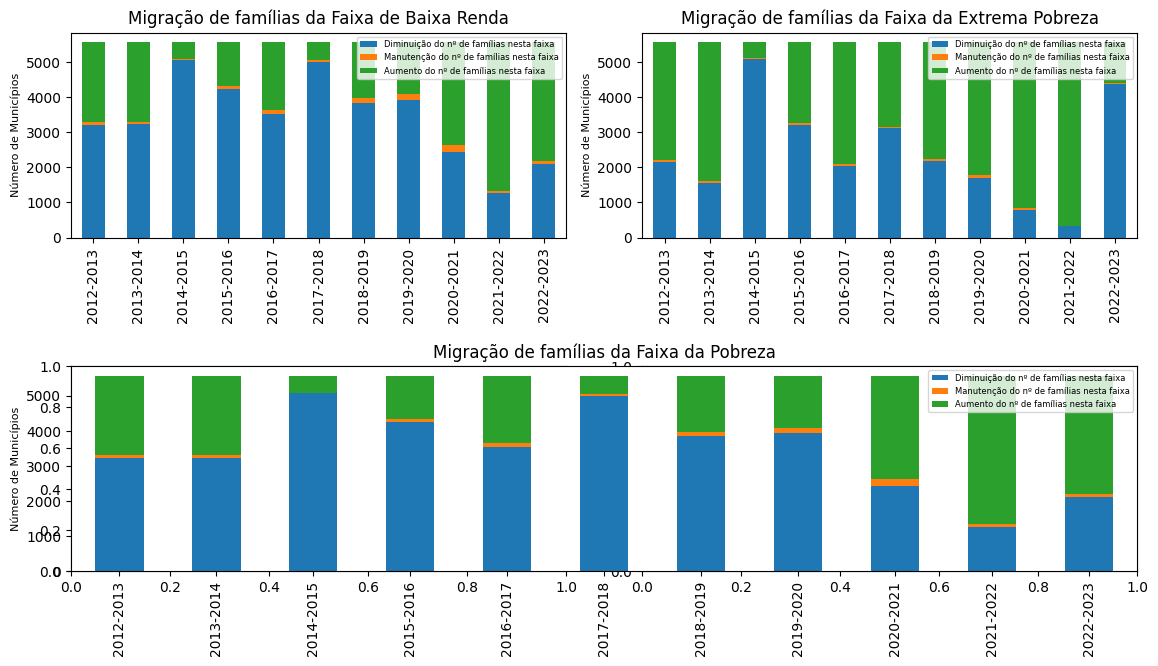

In [205]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

# Ajustar os espaços entre os gráficos
plt.subplots_adjust(wspace=1, hspace=1)  

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Migração de famílias da Faixa de Baixa Renda')
df_cv_baixa_renda.T.plot.bar(stacked=True, ax=ax1)
ax1.set_ylabel('Número de Municípios', fontsize=8)
ax1.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=6)


ax2 = plt.subplot(2, 2, 2)
ax2.set_title('Migração de famílias da Faixa da Extrema Pobreza')
df_cv_extrema_pobreza.T.plot.bar(stacked=True, ax=ax2)
ax2.set_ylabel('Número de Municípios', fontsize=8)
ax2.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=6)

ax3 = plt.subplot(2, 1, 2)
ax3.set_title('Migração de famílias da Faixa da Pobreza')
df_cv_pobreza.T.plot.bar(stacked=True, ax=ax3)
ax3.set_ylabel('Número de Municípios', fontsize=8)
ax3.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=6)

plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


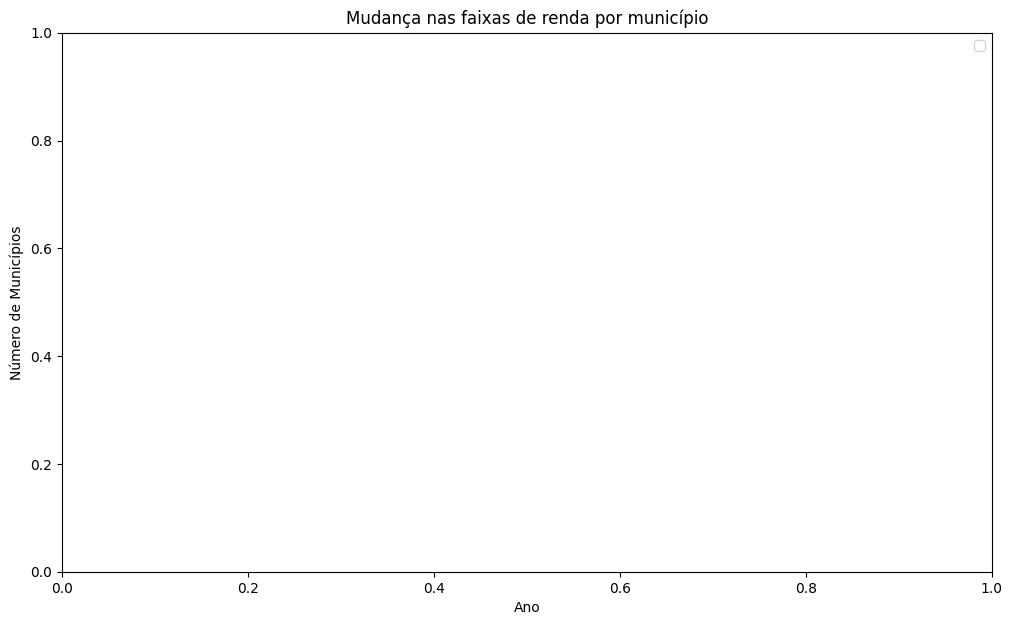

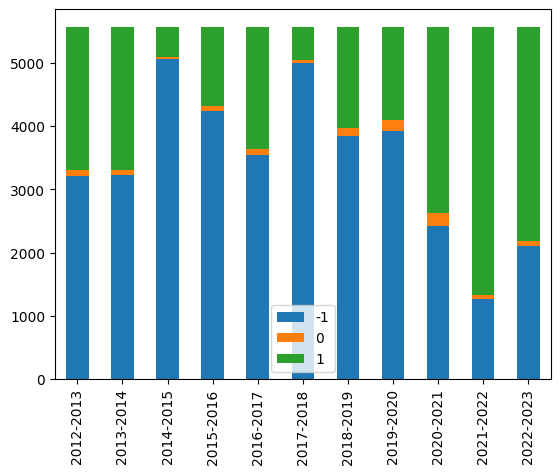

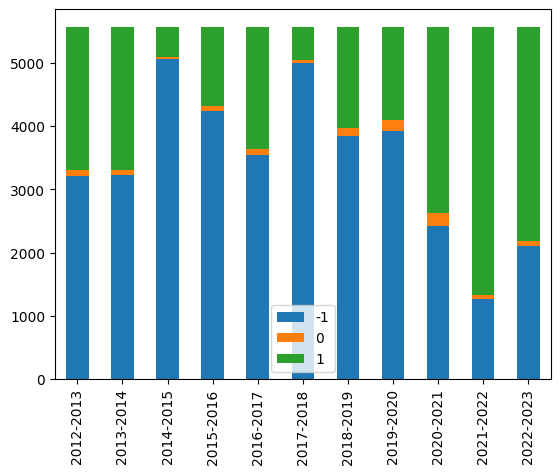

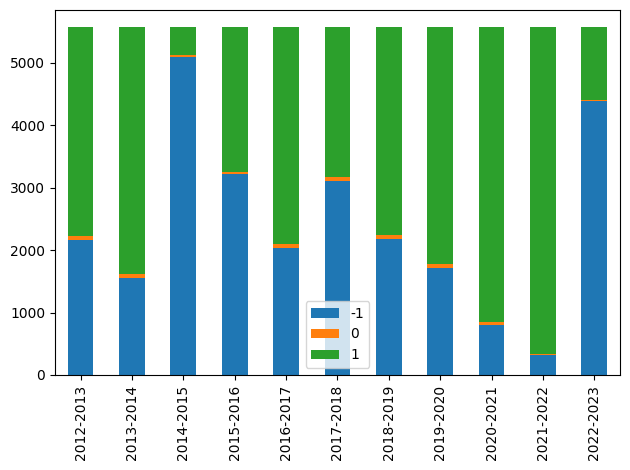

In [204]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot()

df_cv_pobreza.T.plot.bar(stacked=True, label = 'P')
df_cv_baixa_renda.T.plot.bar(stacked=True, label = 'BR')
df_cv_extrema_pobreza.T.plot.bar(stacked=True, label = 'EP')



# Adicionar título e rótulos aos eixos
ax.set_title('Mudança nas faixas de renda por município')
ax.set_ylabel('Número de Municípios')
ax.set_xlabel('Ano')  # Adicione um rótulo ao eixo x se for relevante

# Adicionar uma legenda ao gráfico
ax.legend()

# Ajustar o layout para que a legenda não sobreponha os dados
plt.tight_layout()

In [190]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.set_title('Mudança nas faixas de renda por município')

ax.plot(df_cv_extrema_pobreza.T.plot.bar(stacked=True, ax=ax, label='EP')
ax.plot(df_cv_pobreza.T.plot.bar(stacked=True, ax=ax, label='P')
ax.plot(df_cv_baixa_renda.T.plot.bar(stacked=True, ax=ax, label='BR')

ax.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=4)

ax.set_ylabel('Número de Municípios', fontsize=8)

plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2759401375.py, line 6)

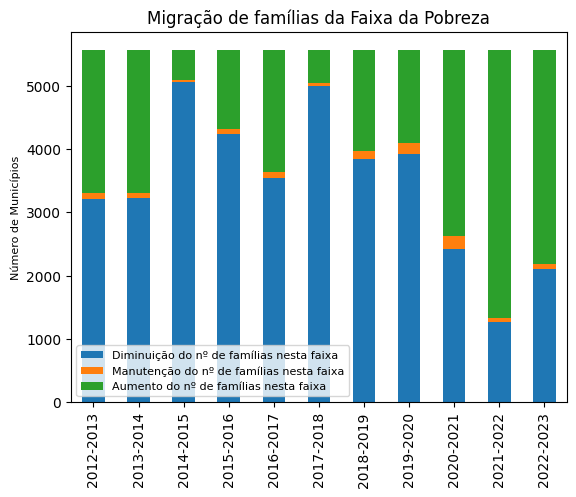

In [168]:
fig, ax = plt.subplots()

ax.set_title('Migração de famílias da Faixa da Pobreza')

df_cv_pobreza.T.plot.bar(stacked=True, ax=ax)

ax.set_ylabel('Número de Municípios', fontsize=8)

ax.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=8)

plt.show()

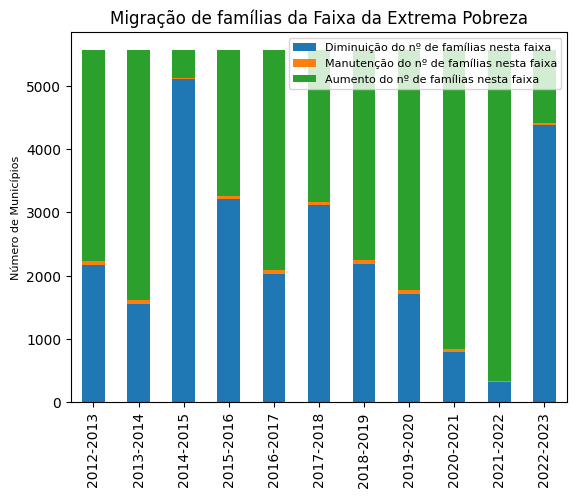

In [169]:
fig, ax = plt.subplots()

ax.set_title('Migração de famílias da Faixa da Extrema Pobreza')

df_cv_extrema_pobreza.T.plot.bar(stacked=True, ax=ax)

ax.set_ylabel('Número de Municípios', fontsize=8)

ax.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=8)

plt.show()

## OUTROS

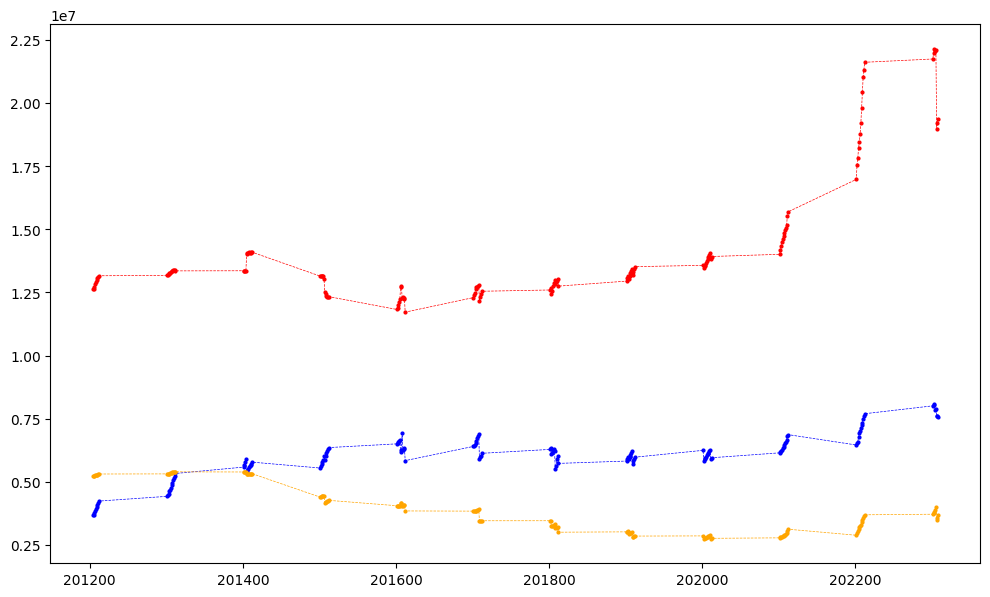

In [56]:
#colors = ['blue', 'orange']
#states, colors
#
#fig = plt.figure(figsize=(12,7))
#ax = fig.add_subplot()
#for state, color in zip(states, colors):
#    ax.plot(state_vaccine_shot_moving_average.index, 
#            state_vaccine_shot_moving_average[[state]], 
#            color=color, linewidth=0.5, linestyle="dashed", 
#            marker="o", markersize=2)


fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(df_cad_2012_2023_fx_renda_fam_ref.index, df_cad_2012_2023_fx_renda_fam_ref['total_fam_bx_renda'],
        color="blue", linewidth=0.5, linestyle="dashed", marker="o", markersize=2)
ax.plot(df_cad_2012_2023_fx_renda_fam_ref.index, df_cad_2012_2023_fx_renda_fam_ref['total_fam_pob'],
        color="orange", linewidth=0.5, linestyle="dashed", marker="o", markersize=2)
ax.plot(df_cad_2012_2023_fx_renda_fam_ref.index, df_cad_2012_2023_fx_renda_fam_ref['total_fam_ext_pob'],
        color="red", linewidth=0.5, linestyle="dashed", marker="o", markersize=2)
##código adicionado
#from datetime import date, timedelta
#ax.set_xlim([date.today() - timedelta(days=365), date.today()])
#ax.set_ylim([0, state_vaccine_shot_moving_average[state].max()]);